This is the main research notebook of the current project.
See full description in [README.md](https://github.com/mvulf/acm-project/blob/main/README.md)

# Import libraries and setup callbacks

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../')

from regelum.simulator import CasADi

from regelum.objective import RunningObjective
from regelum.scenario import Scenario, RLScenario

# For MPC only
from regelum.utils import rg
from regelum.predictor import EulerPredictor
from regelum.model import ModelWeightContainer
# Max Iteration count may be added in opt_options={"print_level": 0, "max_iter": MAX_ITER},
from regelum.optimizable.core.configs import CasadiOptimizerConfig
from regelum.critic import CriticTrivial
from regelum.event import Event

from src.system import HydraulicSystem, StationaryHydraulicSystem
from src.observer import StationaryHydraulicObserver
from src.policy import PDController, MPC
from src.objective import HydraulicObjectiveModel


# Callbacks
from regelum.callback import ScenarioStepLogger
from src.callback import HistoricalDataCallback, SimulatorStepLogger
from regelum import set_ipython_env
%matplotlib inline

callbacks = [SimulatorStepLogger, ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.01
callbacks = set_ipython_env(callbacks=callbacks, interactive=True)

# Setup common parameters and objects

In [2]:
MAX_STEP = 1e-7
FINAL_TIME = 10e-3
SAMPLING_TIME = 1e-3

# Define the initial state
p_atm = 1e5
initial_state = rg.array([1e3, 0, 0, p_atm, p_atm])

# SYSTEM and SIMULATOR
system = HydraulicSystem(
    init_state=initial_state
)
simulator = CasADi(
    system=system,
    state_init=initial_state,
    action_init=rg.array([0]),
    time_final=FINAL_TIME,
    max_step=MAX_STEP,
)

# RUNNING OBJECTIVE
running_objective_model = HydraulicObjectiveModel(
    system=system,
    quad_matrix_type="diagonal", weights=[1, 0, 0]
)  # A quadratic model for running (a.k.a. instant) objective
running_objective = RunningObjective(
    model=running_objective_model
)  # Wrap `running_objective_model` into `RunningObjective` class

# Experiments

Below you can find experiments of both PD and MPC controller

## PD-controller

In [3]:
pd_policy = PDController(
    system=system,
    sampling_time=SAMPLING_TIME,
    P_coef=20, # Let us set it exactly as maximum action
)

scenario = Scenario(
    policy=pd_policy,
    simulator=simulator,
    sampling_time=SAMPLING_TIME,
    N_episodes=1,
    N_iterations=1,
    running_objective=running_objective,
)

scenario.run()

[15:18:31] INFO     runn. objective: 3.71, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=250583;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=294880;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                        

[15:18:43] INFO     runn. objective: 2.92, state est.: [  0.22 432.48], observation: [  0.22       ]8;id=965416;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=480875;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    432.48], action: [17.73], value: 0.0066, time: 0.0010 (10.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[15:18:57] INFO     runn. objective: 1.35, state est.: [  0.77 645.5 ], observation: [  0.77 645.5 ]8;id=386766;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=635602;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [12.01], value: 0.0080, time: 0.0020 (20.0%), episode: 1/1,                         
                    iteration: 1/1                                                                                 

[15:19:13] INFO     runn. objective: 0.26, state est.: [  1.41 651.69], observation: [  1.41       ]8;id=477351;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=608558;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    651.69], action: [5.24], value: 0.0082, time: 0.0030 (30.0%), episode: 1/1,                    
                    iteration: 1/1                                                                                 

[15:19:32] INFO     runn. objective: 0.00, state est.: [  1.99 509.32], observation: [  1.99       ]8;id=166873;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=438593;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    509.32], action: [-0.76], value: 0.0082, time: 0.0040 (40.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[15:19:54] INFO     runn. objective: 0.21, state est.: [  2.38 292.82], observation: [  2.38       ]8;id=847252;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=684097;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    292.82], action: [-4.85], value: 0.0085, time: 0.0050 (50.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[15:20:17] INFO     runn. objective: 0.40, state est.: [ 2.56 72.43], observation: [ 2.56 72.43],  ]8;id=202496;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=67447;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.66], value: 0.0088, time: 0.0060 (60.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[15:20:42] INFO     runn. objective: 0.41, state est.: [2.57 2.19], observation: [2.57 2.19],      ]8;id=113329;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=453907;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.8], value: 0.0093, time: 0.0070 (70.0%), episode: 1/1, iteration:                  
                    1/1                                                                                            

[15:21:11] INFO     runn. objective: 0.41, state est.: [2.57 1.79], observation: [2.57 1.79],      ]8;id=953077;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=303786;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.81], value: 0.0097, time: 0.0080 (80.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[15:21:39] INFO     runn. objective: 0.42, state est.: [2.57 0.94], observation: [2.57 0.94],      ]8;id=42774;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=662356;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.82], value: 0.0101, time: 0.0090 (90.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[15:22:13] INFO     runn. objective: 0.42, state est.: [2.57 2.42], observation: [2.57 2.42],      ]8;id=199764;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=772180;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.83], value: 0.0105, time: 0.0100 (100.0%), episode: 1/1,                           
                    iteration: 1/1                                                                                 

Save and display results

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000
1,0.001000,2.919688,0.006630,1,1,17.729522,0.217593,432.482033
2,0.002000,1.347538,0.007978,1,1,12.012728,0.765468,645.497731
3,0.003000,0.261897,0.008240,1,1,5.239942,1.414544,651.686718
4,0.004000,0.003986,0.008244,1,1,-0.758744,1.989434,509.320458
5,0.005000,0.207389,0.008451,1,1,-4.851873,2.381703,292.824179
6,0.006000,0.395568,0.008847,1,1,-6.662694,2.555245,72.425823
7,0.007000,0.412569,0.009259,1,1,-6.802238,2.568618,2.192204
8,0.008000,0.413955,0.009673,1,1,-6.813489,2.569697,1.793389
9,0.009000,0.415268,0.010089,1,1,-6.824124,2.570716,0.942401


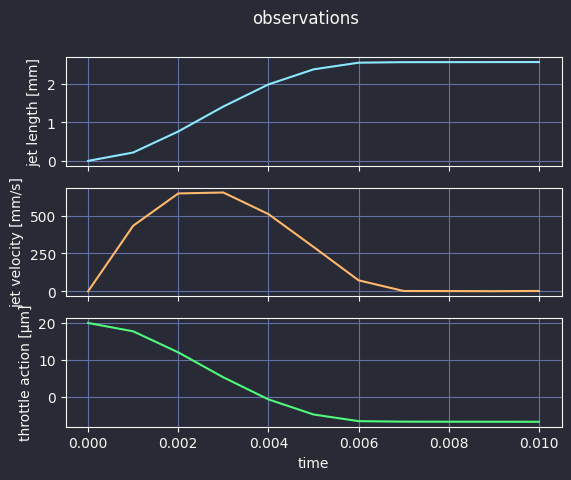

In [4]:
state_trajectory_pd = callbacks[0].data
observations_pd = callbacks[-1].data.iloc[:,:-2]
display(observations_pd)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

In [7]:
state_trajectory_pd.to_csv('./results/state_trajectory_pd.csv', index=False)
observations_pd.to_csv('./results/observations_pd.csv', index=False)

In [8]:
# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

## Model Predictive Control (MPC)

In [9]:
PREDICTION_HORIZON = 5
ACTION_SIZE = 1
PREDICTION_STEP_SIZE = 1 * SAMPLING_TIME

model = ModelWeightContainer(
    dim_output=ACTION_SIZE, 
    weights_init=rg.zeros(
        (PREDICTION_HORIZON + 1, ACTION_SIZE), 
        rc_type=rg.CASADI
    )
)  # A trivial model contains our predicted actions
# System for the predictor
system_model = StationaryHydraulicSystem(
    init_state=initial_state
)
observer = StationaryHydraulicObserver(
    system=system_model
)
predictor = EulerPredictor(
    system=system_model, 
    pred_step_size=PREDICTION_STEP_SIZE
)  # Predictor is used for MPC-prediction

policy_mpc = MPC(
    model=model,
    system=system_model,
    action_bounds=system_model.action_bounds,
    optimizer_config=CasadiOptimizerConfig(),
    prediction_horizon=PREDICTION_HORIZON,
    running_objective=running_objective,
    predictor=predictor
)

scenario = RLScenario(
    policy=policy_mpc,
    observer = observer,
    critic=CriticTrivial(),  # mocked critic
    running_objective=running_objective,
    policy_optimization_event=Event.compute_action,  # run policy optimization on each step
    discount_factor=1.0,
    sampling_time=SAMPLING_TIME,
    simulator=simulator,
    N_episodes=1,
    N_iterations=1,
)

scenario.run()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



[15:24:43] INFO     runn. objective: 3.71, state est.: [1000.    0.    0.], observation: [0. 0.],  ]8;id=130271;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=91931;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration:                    
                    1/1                                                                                            

[15:24:58] INFO     runn. objective: 2.92, state est.: [1000.06  117.74    7.86], observation: [   ]8;id=796667;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=141605;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    0.22 432.48], action: [20.], value: 0.0066, time: 0.0010 (10.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[15:25:15] INFO     runn. objective: 1.29, state est.: [1000.22  189.     12.63], observation: [   ]8;id=123070;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=445390;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    0.79 694.23], action: [3.37], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[15:25:33] INFO     runn. objective: 0.30, state est.: [1000.38  134.83    9.  ], observation: [   ]8;id=449030;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=371696;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    1.38 495.24], action: [-7.11], value: 0.0082, time: 0.0030 (30.0%), episode:                   
                    1/1, iteration: 1/1                                                                            

[15:25:53] INFO     runn. objective: 0.06, state est.: [1000.46   39.89    2.66], observation: [   ]8;id=479570;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=985908;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    1.69 146.52], action: [0.75], value: 0.0083, time: 0.0040 (40.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[15:26:15] INFO     runn. objective: 0.01, state est.: [1000.49   28.6     1.91], observation: [   ]8;id=980749;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=918906;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    1.81 105.06], action: [-1.49], value: 0.0083, time: 0.0050 (50.0%), episode:                   
                    1/1, iteration: 1/1                                                                            

[15:26:41] INFO     runn. objective: 0.00, state est.: [1000.51    8.55    0.57], observation: [   ]8;id=384281;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=610488;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    1.87 31.39], action: [0.15], value: 0.0083, time: 0.0060 (60.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[15:27:05] INFO     runn. objective: 0.00, state est.: [1000.52    6.09    0.41], observation: [   ]8;id=186349;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=600932;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    1.9  22.37], action: [-0.32], value: 0.0083, time: 0.0070 (70.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[15:27:32] INFO     runn. objective: 0.00, state est.: [1000.52    1.83    0.12], observation:     ]8;id=985570;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=680400;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [1.92 6.7 ], action: [0.03], value: 0.0083, time: 0.0080 (80.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[15:28:00] INFO     runn. objective: 0.00, state est.: [1000.52    1.29    0.09], observation:     ]8;id=953237;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=422350;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [1.92 4.75], action: [-0.07], value: 0.0083, time: 0.0090 (90.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[15:28:30] INFO     runn. objective: 0.00, state est.: [1000.52    0.39    0.03], observation:     ]8;id=192634;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=981217;file:///home/vulf/.pyenv/versions/acm-venv/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [1.92 1.45], action: [0.01], value: 0.0083, time: 0.0100 (100.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

Save and display results

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s],piston position [µm],piston velocity [µm/s],throttle position [µm]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
1,0.001000,2.919688,0.006630,1,1,20.000000,0.217593,432.482032,1000.059240,117.743233,7.856631
2,0.002000,1.287058,0.007917,1,1,3.366563,0.791817,694.231119,1000.215572,189.004422,12.629617
3,0.003000,0.299487,0.008217,1,1,-7.111151,1.379049,495.240647,1000.375446,134.829266,8.999252
4,0.004000,0.057826,0.008275,1,1,0.750924,1.685832,146.520690,1000.458968,39.890258,2.659630
5,0.005000,0.013571,0.008288,1,1,-1.491658,1.809810,105.055304,1000.492721,28.601306,1.906858
6,0.006000,0.002634,0.008291,1,1,0.153753,1.874984,31.389021,1000.510464,8.545661,0.569714
7,0.007000,0.000616,0.008292,1,1,-0.316778,1.901481,22.365722,1000.517678,6.089068,0.405940
8,0.008000,0.000120,0.008292,1,1,0.031959,1.915365,6.704835,1000.521458,1.825391,0.121693
9,0.009000,0.000028,0.008292,1,1,-0.066606,1.921013,4.750175,1000.522996,1.293235,0.086216


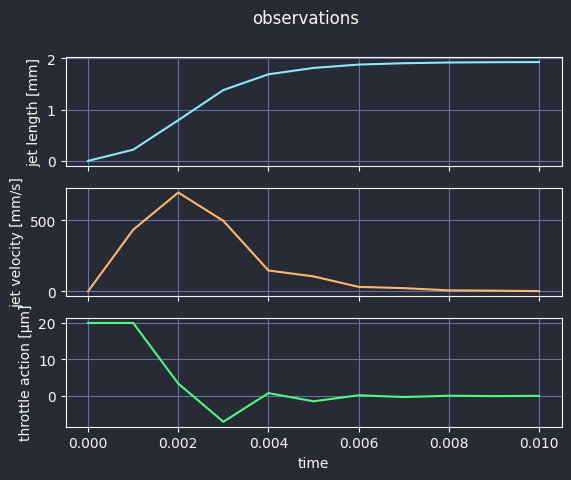

In [10]:
state_trajectory_mpc = callbacks[0].data
observations_mpc = callbacks[-1].data
display(observations_mpc)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

In [11]:
state_trajectory_mpc.to_csv('./results/state_trajectory_mpc.csv', index=False)
observations_mpc.to_csv('./results/observations_mpc.csv', index=False)

In [12]:
# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

# Results

Let us get relative objectives and compare them

In [13]:
observations_list = [
    ('pd', observations_pd),
    ('mpc', observations_mpc)
]

results = []

l_crit = system._parameters["l_crit"]

for name, observations in observations_list:
    last_running_objective = observations['running_objective'].iloc[-1]
    last_running_objective /= l_crit**2 # Get value relative to critical jet length
    
    last_value = observations['current_value'].iloc[-1]
    last_value *= 1e3/l_crit**2 # Get value for ms relative to critical jet length
    
    results.append(
        {
            'control': name,
            'last_running_objective': last_running_objective,
            'value': last_value
        }
    )
    
results = pd.DataFrame(results)
print('Results')
display(results)

percentage = (
    (results['value'].iloc[0] - results['value'].iloc[1])
    /results['value'].iloc[0]
)
print(
    f'Thus, value (total cost) was reduced by {percentage*100:.1f}%'
)

Results


,control,last_running_objective,value
0,pd,0.113365,2.859422
1,mpc,0.000001,2.256967


Thus, value (total cost) was reduced by 21.1%


# Noise

In [8]:
np.random.seed(0)

# SYSTEM and SIMULATOR
system = HydraulicSystem(
    init_state=initial_state
)

# Update observation noize std
system.update_system_parameters(
    {
        "jet_length_std": 1e-1, # Was 10e-2
        "jet_velocity_std": 10, # Was 2e-2
    }
)

{
    'p_l_gauge': 150000.0,
    'x_th_limits': (0.0, 20.0),
    'freq_th': 500.0,
    'm_p': 0.02,
    'D_th': 0.0002,
    'D_hydr': 0.02,
    'D_work': 0.02,
    'h_work_init': 1000.0,
    'D_exit': 0.00033,
    'l_exit': 0.0085,
    'p_coulomb': 10000.0,
    'eta': 0.7,
    'zeta_th': 5.0,
    'rho_hydr': 1000.0,
    'rho_work': 1000.0,
    'beta_v_hydr': 4.9e-10,
    'beta_v_work': 4.9e-10,
    'sigma_work': 0.073,
    'mu_work': 0.001,
    'v_j': 200.0,
    'jet_length_std': 0.1,
    'jet_velocity_std': 10,
    'pressure_std': 0.0,
    'p_atm': 100000.0,
    'g': 9.81,
    'p_l': 250000.0,
    'F_g': 0.1962,
    'A_hydr': 0.0003141592653589793,
    'A_work': 0.0003141592653589793,
    'D_work_exit_2_ratio': 3673.0945821854916,
    'F_coulomb': 3.141592653589793,
    'B_th': 0.04,
    'B_exit': 7.403375106024279,
    'K_hydr': 2040816326.5306125,
    'K_work': 2040816326.5306125,
    'l_crit': 1.9167193623596763,
    'D_drop': 0.6220073077450254
}

Below you can find experiments of both PD and MPC controller for system with noize

## PD-controller for system with noize

In [9]:
pd_policy = PDController(
    system=system,
    sampling_time=SAMPLING_TIME,
    P_coef=20, # Let us set it exactly as maximum action
)

scenario = Scenario(
    policy=pd_policy,
    simulator=simulator,
    sampling_time=SAMPLING_TIME,
    N_episodes=7,
    N_iterations=1,
    running_objective=running_objective,
)

scenario.run()

[13:57:40] INFO     runn. objective: 3.71, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=709533;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=184630;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/7, iteration: 1/1                        

[13:57:44] INFO     runn. objective: 3.37, state est.: [  0.09 437.97], observation: [  0.09       ]8;id=252556;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=508274;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    437.97], action: [19.05], value: 0.0071, time: 0.0010 (10.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[13:57:50] INFO     runn. objective: 0.85, state est.: [  1.01 690.52], observation: [  1.01       ]8;id=441830;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=112712;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    690.52], action: [9.5], value: 0.0079, time: 0.0020 (20.0%), episode: 1/7,                     
                    iteration: 1/1                                                                                 

[13:57:58] INFO     runn. objective: 0.51, state est.: [  1.21 624.79], observation: [  1.21       ]8;id=497359;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=717278;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    624.79], action: [7.34], value: 0.0084, time: 0.0030 (30.0%), episode: 1/7,                    
                    iteration: 1/1                                                                                 

[13:58:07] INFO     runn. objective: 0.17, state est.: [  2.34 522.7 ], observation: [  2.34 522.7 ]8;id=921581;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=124793;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [-4.4], value: 0.0086, time: 0.0040 (40.0%), episode: 1/7,                          
                    iteration: 1/1                                                                                 

[13:58:18] INFO     runn. objective: 0.24, state est.: [  2.41 229.81], observation: [  2.41       ]8;id=354863;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=49353;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    229.81], action: [-5.18], value: 0.0088, time: 0.0050 (50.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[13:58:30] INFO     runn. objective: 0.30, state est.: [ 2.47 36.15], observation: [ 2.47 36.15],  ]8;id=337776;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=316279;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.77], value: 0.0091, time: 0.0060 (60.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[13:58:45] INFO     runn. objective: 0.42, state est.: [ 2.57 -3.71], observation: [ 2.57 -3.71],  ]8;id=377275;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=921740;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.84], value: 0.0096, time: 0.0070 (70.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[13:59:01] INFO     runn. objective: 0.36, state est.: [2.53 7.18], observation: [2.53 7.18],      ]8;id=764386;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=965066;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.35], value: 0.0099, time: 0.0080 (80.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[13:59:18] INFO     runn. objective: 0.28, state est.: [  2.45 -12.03], observation: [  2.45       ]8;id=204185;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=282830;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -12.03], action: [-5.6], value: 0.0102, time: 0.0090 (90.0%), episode: 1/7,                    
                    iteration: 1/1                                                                                 

[13:59:37] INFO     runn. objective: 0.36, state est.: [ 2.53 -8.99], observation: [ 2.53 -8.99],  ]8;id=77189;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=611840;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.37], value: 0.0106, time: 0.0100 (100.0%), episode: 1/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 4.17, state est.: [-0.12  7.42], observation: [-0.12  7.42],  ]8;id=944304;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=956069;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [20.], value: 0.0042, time: 0.0000 (0.0%), episode: 2/7, iteration:                    
                    1/1                                                                                            

[13:59:58] INFO     runn. objective: 2.95, state est.: [  0.21 435.02], observation: [  0.21       ]8;id=960201;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=219104;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    435.02], action: [17.81], value: 0.0071, time: 0.0010 (10.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[14:00:21] INFO     runn. objective: 1.23, state est.: [  0.82 656.24], observation: [  0.82       ]8;id=347249;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=861804;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    656.24], action: [11.47], value: 0.0084, time: 0.0020 (20.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[14:00:45] INFO     runn. objective: 0.28, state est.: [  1.39 627.19], observation: [  1.39       ]8;id=963980;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=440585;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    627.19], action: [5.44], value: 0.0086, time: 0.0030 (30.0%), episode: 2/7,                    
                    iteration: 1/1                                                                                 

[14:01:10] INFO     runn. objective: 0.00, state est.: [  1.91 508.9 ], observation: [  1.91 508.9 ]8;id=449187;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=334826;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [0.11], value: 0.0086, time: 0.0040 (40.0%), episode: 2/7,                          
                    iteration: 1/1                                                                                 

[14:01:37] INFO     runn. objective: 0.24, state est.: [  2.41 303.02], observation: [  2.41       ]8;id=685615;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=89593;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    303.02], action: [-5.18], value: 0.0089, time: 0.0050 (50.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[14:02:06] INFO     runn. objective: 0.46, state est.: [ 2.61 85.65], observation: [ 2.61 85.65],  ]8;id=462806;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=365094;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-7.21], value: 0.0093, time: 0.0060 (60.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[14:02:36] INFO     runn. objective: 0.49, state est.: [ 2.62 11.03], observation: [ 2.62 11.03],  ]8;id=390545;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=654348;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-7.38], value: 0.0098, time: 0.0070 (70.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[14:03:07] INFO     runn. objective: 0.30, state est.: [2.48 2.1 ], observation: [2.48 2.1 ],      ]8;id=961728;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=632754;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.86], value: 0.0101, time: 0.0080 (80.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[14:03:40] INFO     runn. objective: 0.22, state est.: [  2.4  -12.04], observation: [  2.4        ]8;id=806858;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=334085;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -12.04], action: [-5.04], value: 0.0103, time: 0.0090 (90.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[14:04:14] INFO     runn. objective: 0.44, state est.: [2.59 3.24], observation: [2.59 3.24],      ]8;id=107045;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=768252;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.99], value: 0.0108, time: 0.0100 (100.0%), episode: 2/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.68, state est.: [ 0.01 -9.67], observation: [ 0.01 -9.67],  ]8;id=582413;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=197925;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [19.93], value: 0.0037, time: 0.0000 (0.0%), episode: 3/7, iteration:                  
                    1/1                                                                                            

[14:04:52] INFO     runn. objective: 2.91, state est.: [  0.22 425.79], observation: [  0.22       ]8;id=491602;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=385813;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    425.79], action: [17.69], value: 0.0066, time: 0.0010 (10.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[14:05:32] INFO     runn. objective: 1.55, state est.: [  0.68 638.97], observation: [  0.68       ]8;id=38199;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=970597;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    638.97], action: [12.89], value: 0.0081, time: 0.0020 (20.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[14:06:14] INFO     runn. objective: 0.22, state est.: [  1.45 671.51], observation: [  1.45       ]8;id=946768;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=742239;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    671.51], action: [4.83], value: 0.0084, time: 0.0030 (30.0%), episode: 3/7,                    
                    iteration: 1/1                                                                                 

[14:06:57] INFO     runn. objective: 0.05, state est.: [  2.16 527.43], observation: [  2.16       ]8;id=35663;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=171842;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    527.43], action: [-2.5], value: 0.0084, time: 0.0040 (40.0%), episode: 3/7,                    
                    iteration: 1/1                                                                                 

[14:07:42] INFO     runn. objective: 0.18, state est.: [  2.35 264.54], observation: [  2.35       ]8;id=998240;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=916728;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    264.54], action: [-4.53], value: 0.0086, time: 0.0050 (50.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[14:08:27] INFO     runn. objective: 0.32, state est.: [ 2.49 58.16], observation: [ 2.49 58.16],  ]8;id=464709;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=309451;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.96], value: 0.0089, time: 0.0060 (60.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[14:09:13] INFO     runn. objective: 0.29, state est.: [  2.46 -13.8 ], observation: [  2.46 -13.8 ]8;id=651741;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=251317;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [-5.7], value: 0.0092, time: 0.0070 (70.0%), episode: 3/7,                          
                    iteration: 1/1                                                                                 

[14:10:03] INFO     runn. objective: 0.32, state est.: [2.49 1.43], observation: [2.49 1.43],      ]8;id=791122;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=481894;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.99], value: 0.0095, time: 0.0080 (80.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[14:10:53] INFO     runn. objective: 0.52, state est.: [ 2.64 18.55], observation: [ 2.64 18.55],  ]8;id=428918;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=170785;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-7.6], value: 0.0100, time: 0.0090 (90.0%), episode: 3/7, iteration:                  
                    1/1                                                                                            

[14:11:45] INFO     runn. objective: 0.19, state est.: [2.36 2.41], observation: [2.36 2.41],      ]8;id=89073;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=127866;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-4.63], value: 0.0102, time: 0.0100 (100.0%), episode: 3/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.63, state est.: [  0.02 -13.84], observation: [  0.02       ]8;id=660793;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=708786;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -13.84], action: [19.78], value: 0.0036, time: 0.0000 (0.0%), episode: 4/7,                    
                    iteration: 1/1                                                                                 

[14:12:38] INFO     runn. objective: 3.47, state est.: [  0.06 429.71], observation: [  0.06       ]8;id=626503;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=392981;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    429.71], action: [19.34], value: 0.0071, time: 0.0010 (10.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[14:13:33] INFO     runn. objective: 1.36, state est.: [  0.76 678.39], observation: [  0.76       ]8;id=253868;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=767454;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    678.39], action: [12.08], value: 0.0085, time: 0.0020 (20.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[14:14:29] INFO     runn. objective: 0.20, state est.: [  1.48 662.86], observation: [  1.48       ]8;id=575655;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=991176;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    662.86], action: [4.56], value: 0.0087, time: 0.0030 (30.0%), episode: 4/7,                    
                    iteration: 1/1                                                                                 

[14:15:27] INFO     runn. objective: 0.03, state est.: [  2.09 511.03], observation: [  2.09       ]8;id=197468;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=881687;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    511.03], action: [-1.86], value: 0.0087, time: 0.0040 (40.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[14:16:26] INFO     runn. objective: 0.15, state est.: [  2.32 262.79], observation: [  2.32       ]8;id=679824;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=292637;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    262.79], action: [-4.18], value: 0.0088, time: 0.0050 (50.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[14:17:26] INFO     runn. objective: 0.42, state est.: [ 2.57 61.15], observation: [ 2.57 61.15],  ]8;id=154573;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=74326;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.82], value: 0.0093, time: 0.0060 (60.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[14:18:27] INFO     runn. objective: 0.23, state est.: [ 2.41 -1.32], observation: [ 2.41 -1.32],  ]8;id=96890;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=151334;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.13], value: 0.0095, time: 0.0070 (70.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[14:19:30] INFO     runn. objective: 0.51, state est.: [  2.64 -18.15], observation: [  2.64       ]8;id=677260;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=688610;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -18.15], action: [-7.58], value: 0.0100, time: 0.0080 (80.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[14:20:33] INFO     runn. objective: 0.25, state est.: [  2.42 -13.71], observation: [  2.42       ]8;id=65418;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=342557;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -13.71], action: [-5.27], value: 0.0102, time: 0.0090 (90.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[14:21:37] INFO     runn. objective: 0.45, state est.: [  2.59 -10.11], observation: [  2.59       ]8;id=172493;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=395657;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -10.11], action: [-7.07], value: 0.0107, time: 0.0100 (100.0%), episode: 4/7,                  
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.70, state est.: [0.   1.95], observation: [0.   1.95],      ]8;id=221596;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=219243;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [19.98], value: 0.0037, time: 0.0000 (0.0%), episode: 5/7, iteration:                  
                    1/1                                                                                            

[14:22:45] INFO     runn. objective: 3.11, state est.: [  0.16 417.06], observation: [  0.16       ]8;id=961454;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=209751;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    417.06], action: [18.3], value: 0.0068, time: 0.0010 (10.0%), episode: 5/7,                    
                    iteration: 1/1                                                                                 

[14:23:56] INFO     runn. objective: 0.97, state est.: [  0.94 650.01], observation: [  0.94       ]8;id=592053;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=517068;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    650.01], action: [10.19], value: 0.0078, time: 0.0020 (20.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[14:25:12] INFO     runn. objective: 0.22, state est.: [  1.45 618.53], observation: [  1.45       ]8;id=850763;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=919366;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    618.53], action: [4.85], value: 0.0080, time: 0.0030 (30.0%), episode: 5/7,                    
                    iteration: 1/1                                                                                 

[14:26:30] INFO     runn. objective: 0.00, state est.: [  1.97 476.86], observation: [  1.97       ]8;id=209720;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=360786;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    476.86], action: [-0.52], value: 0.0080, time: 0.0040 (40.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[14:27:49] INFO     runn. objective: 0.14, state est.: [  2.3  288.89], observation: [  2.3        ]8;id=295506;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=557396;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    288.89], action: [-4.04], value: 0.0082, time: 0.0050 (50.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[14:29:11] INFO     runn. objective: 0.26, state est.: [ 2.43 78.59], observation: [ 2.43 78.59],  ]8;id=553004;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=86216;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.38], value: 0.0084, time: 0.0060 (60.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[14:30:34] INFO     runn. objective: 0.41, state est.: [  2.56 -13.46], observation: [  2.56       ]8;id=568928;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=268125;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -13.46], action: [-6.75], value: 0.0088, time: 0.0070 (70.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[14:32:00] INFO     runn. objective: 0.48, state est.: [2.62 2.03], observation: [2.62 2.03],      ]8;id=259603;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=70707;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-7.37], value: 0.0093, time: 0.0080 (80.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[14:33:28] INFO     runn. objective: 0.32, state est.: [2.49 8.62], observation: [2.49 8.62],      ]8;id=449337;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=85003;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.02], value: 0.0096, time: 0.0090 (90.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[14:34:54] INFO     runn. objective: 0.32, state est.: [2.49 2.17], observation: [2.49 2.17],      ]8;id=620319;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=912451;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.98], value: 0.0099, time: 0.0100 (100.0%), episode: 5/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.39, state est.: [ 0.09 22.39], observation: [ 0.09 22.39],  ]8;id=574274;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=484419;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [19.1], value: 0.0034, time: 0.0000 (0.0%), episode: 6/7, iteration:                   
                    1/1                                                                                            

[14:36:22] INFO     runn. objective: 2.64, state est.: [  0.3 400.4], observation: [  0.3 400.4],  ]8;id=638063;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=562538;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [16.84], value: 0.0060, time: 0.0010 (10.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[14:37:51] INFO     runn. objective: 1.35, state est.: [  0.76 616.41], observation: [  0.76       ]8;id=352066;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=955189;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    616.41], action: [12.04], value: 0.0074, time: 0.0020 (20.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[14:39:22] INFO     runn. objective: 0.34, state est.: [  1.35 625.38], observation: [  1.35       ]8;id=49027;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=304260;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    625.38], action: [5.96], value: 0.0077, time: 0.0030 (30.0%), episode: 6/7,                    
                    iteration: 1/1                                                                                 

[14:40:55] INFO     runn. objective: 0.01, state est.: [  2.02 519.75], observation: [  2.02       ]8;id=106424;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=376413;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    519.75], action: [-1.04], value: 0.0077, time: 0.0040 (40.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[14:42:28] INFO     runn. objective: 0.15, state est.: [  2.32 289.06], observation: [  2.32       ]8;id=588963;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=740879;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    289.06], action: [-4.19], value: 0.0079, time: 0.0050 (50.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[14:44:01] INFO     runn. objective: 0.55, state est.: [ 2.67 78.08], observation: [ 2.67 78.08],  ]8;id=839497;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=95357;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-7.81], value: 0.0084, time: 0.0060 (60.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[14:45:35] INFO     runn. objective: 0.59, state est.: [2.69 7.51], observation: [2.69 7.51],      ]8;id=101144;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=653612;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-8.09], value: 0.0090, time: 0.0070 (70.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[14:47:12] INFO     runn. objective: 0.23, state est.: [ 2.4  -1.71], observation: [ 2.4  -1.71],  ]8;id=487143;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=832467;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.08], value: 0.0092, time: 0.0080 (80.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[14:48:53] INFO     runn. objective: 0.15, state est.: [ 2.32 -3.54], observation: [ 2.32 -3.54],  ]8;id=391083;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=151040;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-4.19], value: 0.0094, time: 0.0090 (90.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[14:50:33] INFO     runn. objective: 0.29, state est.: [ 2.46 -0.96], observation: [ 2.46 -0.96],  ]8;id=801543;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=819642;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-5.69], value: 0.0097, time: 0.0100 (100.0%), episode: 6/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.94, state est.: [-0.06  8.36], observation: [-0.06  8.36],  ]8;id=152663;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=119094;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [20.], value: 0.0039, time: 0.0000 (0.0%), episode: 7/7, iteration:                    
                    1/1                                                                                            

[14:52:19] INFO     runn. objective: 2.75, state est.: [  0.27 432.4 ], observation: [  0.27 432.4 ]8;id=548130;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=489233;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    ], action: [17.2], value: 0.0067, time: 0.0010 (10.0%), episode: 7/7,                          
                    iteration: 1/1                                                                                 

[14:54:05] INFO     runn. objective: 1.55, state est.: [  0.68 638.83], observation: [  0.68       ]8;id=776032;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=890988;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    638.83], action: [12.88], value: 0.0082, time: 0.0020 (20.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[14:55:49] INFO     runn. objective: 0.31, state est.: [  1.37 661.88], observation: [  1.37       ]8;id=338905;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=1304;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    661.88], action: [5.71], value: 0.0085, time: 0.0030 (30.0%), episode: 7/7,                    
                    iteration: 1/1                                                                                 

[14:57:33] INFO     runn. objective: 0.01, state est.: [  2.01 515.29], observation: [  2.01       ]8;id=757303;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=716166;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    515.29], action: [-0.97], value: 0.0085, time: 0.0040 (40.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[14:59:19] INFO     runn. objective: 0.23, state est.: [  2.41 294.78], observation: [  2.41       ]8;id=945681;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=240042;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    294.78], action: [-5.11], value: 0.0088, time: 0.0050 (50.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[15:01:06] INFO     runn. objective: 0.39, state est.: [ 2.55 79.46], observation: [ 2.55 79.46],  ]8;id=98856;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=316798;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.59], value: 0.0092, time: 0.0060 (60.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[15:02:55] INFO     runn. objective: 0.35, state est.: [ 2.52 18.68], observation: [ 2.52 18.68],  ]8;id=233592;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=916930;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-6.3], value: 0.0095, time: 0.0070 (70.0%), episode: 7/7, iteration:                  
                    1/1                                                                                            

[15:04:47] INFO     runn. objective: 0.53, state est.: [2.65 3.55], observation: [2.65 3.55],      ]8;id=70766;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=221135;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-7.66], value: 0.0100, time: 0.0080 (80.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[15:06:42] INFO     runn. objective: 0.43, state est.: [  2.58 -14.77], observation: [  2.58       ]8;id=840217;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=289196;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    -14.77], action: [-6.92], value: 0.0105, time: 0.0090 (90.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[15:08:37] INFO     runn. objective: 0.59, state est.: [ 2.69 14.45], observation: [ 2.69 14.45],  ]8;id=193660;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=453050;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    action: [-8.08], value: 0.0111, time: 0.0100 (100.0%), episode: 7/7,                           
                    iteration: 1/1                                                                                 

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000
1,0.001000,3.366782,0.007077,1,1,19.046040,0.091424,437.968833
2,0.002000,0.847298,0.007925,1,1,9.504826,1.005815,690.516718
3,0.003000,0.508899,0.008434,1,1,7.343675,1.212931,624.793171
4,0.004000,0.169883,0.008604,1,1,-4.400777,2.338472,522.695731
...,...,...,...,...,...,...,...,...
72,0.006000,0.386904,0.009167,7,1,-6.590428,2.548319,79.459629
73,0.007000,0.352690,0.009520,7,1,-6.296811,2.520180,18.678478
74,0.008000,0.525262,0.010045,7,1,-7.662397,2.651053,3.545941
75,0.009000,0.426697,0.010472,7,1,-6.916024,2.579523,-14.769265


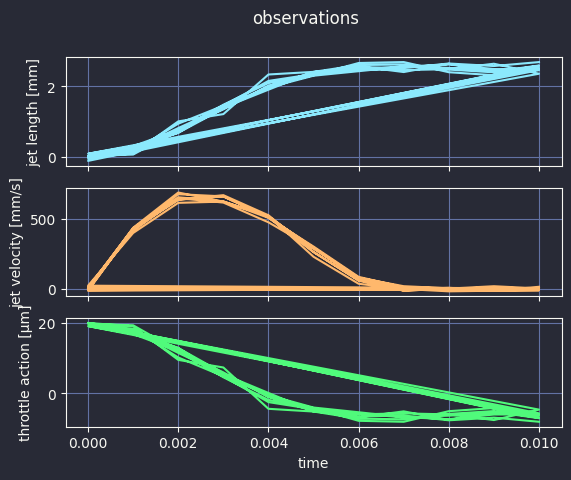

In [11]:
state_trajectory_pd_noize = callbacks[0].data
observations_pd_noize = callbacks[-1].data.iloc[:,:-2]
observations_pd_noize.to_csv('./results/observations_pd_noize.csv')
display(observations_pd_noize)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

## Model Predictive Control (MPC) for system with noize

In [3]:
PREDICTION_HORIZON = 5
ACTION_SIZE = 1
PREDICTION_STEP_SIZE = 1 * SAMPLING_TIME

model = ModelWeightContainer(
    dim_output=ACTION_SIZE, 
    weights_init=rg.zeros(
        (PREDICTION_HORIZON + 1, ACTION_SIZE), 
        rc_type=rg.CASADI
    )
)  # A trivial model contains our predicted actions
# System for the predictor
system_model = StationaryHydraulicSystem(
    init_state=initial_state
)
observer = StationaryHydraulicObserver(
    system=system_model
)
predictor = EulerPredictor(
    system=system_model, 
    pred_step_size=PREDICTION_STEP_SIZE
)  # Predictor is used for MPC-prediction

# # Update observation noize std
# system.update_system_parameters(
#     {
#         "jet_length_std": 1e-1, # Was 10e-2
#         "jet_velocity_std": 10, # Was 2e-2
#     }
# )

# system_model.update_system_parameters(
#     {
#         "jet_length_std": 1e-1, # Was 10e-2
#         "jet_velocity_std": 10, # Was 2e-2
#     }
# )

policy_mpc = MPC(
    model=model,
    system=system_model,
    action_bounds=system_model.action_bounds,
    optimizer_config=CasadiOptimizerConfig(),
    prediction_horizon=PREDICTION_HORIZON,
    running_objective=running_objective,
    predictor=predictor
)

scenario = RLScenario(
    policy=policy_mpc,
    observer = observer,
    critic=CriticTrivial(),  # mocked critic
    running_objective=running_objective,
    policy_optimization_event=Event.compute_action,  # run policy optimization on each step
    discount_factor=1.0,
    sampling_time=SAMPLING_TIME,
    simulator=simulator,
    N_episodes=7,
    N_iterations=1,
)

scenario.run()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



[03:32:45] INFO     runn. objective: 3.71, state est.: [1000.    0.    0.], observation: [0. 0.],  ]8;id=969570;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=768445;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/7, iteration:                    
                    1/1                                                                                            

[03:32:57] INFO     runn. objective: 2.54, state est.: [1000.09  115.71    7.72], observation: [   ]8;id=801251;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=11993;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.33 425.03], action: [20.], value: 0.0063, time: 0.0010 (10.0%), episode:                     
                    1/7, iteration: 1/1                                                                            

[03:33:10] INFO     runn. objective: 1.24, state est.: [1000.22  196.18   13.11], observation: [   ]8;id=641837;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=946367;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.81 720.6 ], action: [1.09], value: 0.0075, time: 0.0020 (20.0%), episode:                    
                    1/7, iteration: 1/1                                                                            

[03:33:24] INFO     runn. objective: 0.43, state est.: [1000.35  122.08    8.15], observation: [   ]8;id=406189;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=545368;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.27 448.43], action: [-0.51], value: 0.0079, time: 0.0030 (30.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

[03:33:39] INFO     runn. objective: 0.09, state est.: [1000.45   71.03    4.74], observation: [   ]8;id=768579;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=650191;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.63 260.9 ], action: [-3.62], value: 0.0080, time: 0.0040 (40.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

[03:33:56] INFO     runn. objective: 0.10, state est.: [1000.44   23.34    1.56], observation: [   ]8;id=608987;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=395931;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.61 85.75], action: [6.84], value: 0.0081, time: 0.0050 (50.0%), episode:                     
                    1/7, iteration: 1/1                                                                            

[03:34:15] INFO     runn. objective: 0.01, state est.: [1000.49   53.32    3.56], observation: [   ]8;id=685459;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=371765;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.81 195.83], action: [-5.04], value: 0.0081, time: 0.0060 (60.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

[03:34:34] INFO     runn. objective: 0.05, state est.: [1000.58    7.52    0.5 ], observation: [   ]8;id=683507;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=480170;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.15 27.61], action: [-0.59], value: 0.0082, time: 0.0070 (70.0%), episode:                    
                    1/7, iteration: 1/1                                                                            

[03:34:54] INFO     runn. objective: 0.07, state est.: [1000.6     1.59    0.11], observation:     ]8;id=435017;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=893495;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [2.2  5.84], action: [-0.75], value: 0.0082, time: 0.0080 (80.0%), episode:                    
                    1/7, iteration: 1/1                                                                            

[03:35:15] INFO     runn. objective: 0.01, state est.: [1000.56   -4.12   -0.26], observation: [   ]8;id=917379;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=395898;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.05 -15.12], action: [-0.], value: 0.0083, time: 0.0090 (90.0%), episode:                     
                    1/7, iteration: 1/1                                                                            

[03:35:38] INFO     runn. objective: 0.02, state est.: [1000.56    2.03    0.14], observation:     ]8;id=981206;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=225627;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [2.07 7.46], action: [-0.41], value: 0.0083, time: 0.0100 (100.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.30, state est.: [1000.03    1.02    0.07], observation:     ]8;id=787135;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=144463;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.11 3.75], action: [20.], value: 0.0033, time: 0.0000 (0.0%), episode: 2/7,                  
                    iteration: 1/1                                                                                 

[03:36:04] INFO     runn. objective: 2.96, state est.: [1000.06  119.34    7.96], observation: [   ]8;id=283820;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=220486;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.21 438.34], action: [20.], value: 0.0063, time: 0.0010 (10.0%), episode:                     
                    2/7, iteration: 1/1                                                                            

[03:36:32] INFO     runn. objective: 1.54, state est.: [1000.19  190.81   12.75], observation: [   ]8;id=367013;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=544993;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.69 700.85], action: [6.88], value: 0.0078, time: 0.0020 (20.0%), episode:                    
                    2/7, iteration: 1/1                                                                            

[03:37:12] INFO     runn. objective: 0.28, state est.: [1000.38  159.7    10.66], observation: [   ]8;id=745058;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=812566;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.4  586.59], action: [-11.98], value: 0.0081, time: 0.0030 (30.0%), episode:                  
                    2/7, iteration: 1/1                                                                            

[03:37:50] INFO     runn. objective: 0.03, state est.: [1000.48   27.07    1.8 ], observation: [   ]8;id=871698;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=606620;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.75 99.42], action: [1.], value: 0.0081, time: 0.0040 (40.0%), episode: 2/7,                  
                    iteration: 1/1                                                                                 

[03:38:22] INFO     runn. objective: 0.08, state est.: [1000.45   22.28    1.49], observation: [   ]8;id=437768;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=685737;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.65 81.83], action: [5.7], value: 0.0082, time: 0.0050 (50.0%), episode: 2/7,                 
                    iteration: 1/1                                                                                 

[03:38:58] INFO     runn. objective: 0.01, state est.: [1000.5    43.64    2.91], observation: [   ]8;id=178240;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=256950;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.85 160.31], action: [-2.91], value: 0.0082, time: 0.0060 (60.0%), episode:                   
                    2/7, iteration: 1/1                                                                            

[03:39:40] INFO     runn. objective: 0.00, state est.: [1000.53   11.22    0.75], observation: [   ]8;id=666402;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=968028;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.96 41.2 ], action: [-1.7], value: 0.0082, time: 0.0070 (70.0%), episode:                     
                    2/7, iteration: 1/1                                                                            

[03:40:29] INFO     runn. objective: 0.00, state est.: [1000.53   -2.05   -0.13], observation: [   ]8;id=416979;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=129370;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.95 -7.54], action: [-0.], value: 0.0082, time: 0.0080 (80.0%), episode: 2/7,                 
                    iteration: 1/1                                                                                 

[03:41:21] INFO     runn. objective: 0.00, state est.: [1000.54   -2.29   -0.14], observation: [   ]8;id=816773;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=526384;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.97 -8.41], action: [-0.], value: 0.0082, time: 0.0090 (90.0%), episode: 2/7,                 
                    iteration: 1/1                                                                                 

[03:42:14] INFO     runn. objective: 0.00, state est.: [1000.53   -3.12   -0.19], observation: [   ]8;id=283316;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=465483;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.94 -11.45], action: [-0.], value: 0.0082, time: 0.0100 (100.0%), episode:                    
                    2/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.98, state est.: [999.98  -1.99  -0.12], observation: [-0.07 ]8;id=624377;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=768040;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -7.3 ], action: [0.01], value: 0.0040, time: 0.0000 (0.0%), episode: 3/7,                      
                    iteration: 1/1                                                                                 

[03:43:07] INFO     runn. objective: 4.10, state est.: [999.97  -1.48  -0.09], observation: [-0.1  ]8;id=922302;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=509536;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -5.42], action: [0.01], value: 0.0081, time: 0.0010 (10.0%), episode: 3/7,                     
                    iteration: 1/1                                                                                 

[03:44:04] INFO     runn. objective: 3.92, state est.: [999.99  -1.79  -0.11], observation: [-0.05 ]8;id=371207;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=556134;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -6.59], action: [0.01], value: 0.0120, time: 0.0020 (20.0%), episode: 3/7,                     
                    iteration: 1/1                                                                                 

[03:45:01] INFO     runn. objective: 3.79, state est.: [999.99   2.36   0.16], observation: [-0.02 ]8;id=306611;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=230490;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    8.67], action: [20.], value: 0.0158, time: 0.0030 (30.0%), episode: 3/7,                       
                    iteration: 1/1                                                                                 

[03:45:56] INFO     runn. objective: 3.15, state est.: [1000.04  120.67    8.05], observation: [   ]8;id=544726;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=146859;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.15 443.22], action: [20.], value: 0.0189, time: 0.0040 (40.0%), episode:                     
                    3/7, iteration: 1/1                                                                            

[03:46:51] INFO     runn. objective: 1.44, state est.: [1000.2   188.99   12.63], observation: [   ]8;id=653552;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=387142;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.73 694.18], action: [5.78], value: 0.0204, time: 0.0050 (50.0%), episode:                    
                    3/7, iteration: 1/1                                                                            

[03:47:48] INFO     runn. objective: 0.15, state est.: [1000.42  153.74   10.27], observation: [   ]8;id=571907;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=914326;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.54 564.71], action: [-11.32], value: 0.0205, time: 0.0060 (60.0%), episode:                  
                    3/7, iteration: 1/1                                                                            

[03:48:48] INFO     runn. objective: 0.20, state est.: [1000.4    26.08    1.74], observation: [   ]8;id=601596;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=92435;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.48 95.79], action: [11.11], value: 0.0207, time: 0.0070 (70.0%), episode:                    
                    3/7, iteration: 1/1                                                                            

[03:49:48] INFO     runn. objective: 0.01, state est.: [1000.5    77.79    5.19], observation: [   ]8;id=887767;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=543668;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.85 285.73], action: [-12.83], value: 0.0207, time: 0.0080 (80.0%), episode:                  
                    3/7, iteration: 1/1                                                                            

[03:50:40] INFO     runn. objective: 0.00, state est.: [1000.52    1.86    0.12], observation:     ]8;id=857420;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=565492;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 6.84], action: [-0.05], value: 0.0207, time: 0.0090 (90.0%), episode:                    
                    3/7, iteration: 1/1                                                                            

[03:51:49] INFO     runn. objective: 0.04, state est.: [1000.58    0.22    0.01], observation:     ]8;id=502586;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=916751;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [2.14 0.81], action: [-0.45], value: 0.0208, time: 0.0100 (100.0%), episode:                   
                    3/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.62, state est.: [1000.01    0.12    0.01], observation:     ]8;id=890931;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=974071;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.02 0.43], action: [20.], value: 0.0036, time: 0.0000 (0.0%), episode: 4/7,                  
                    iteration: 1/1                                                                                 

[03:52:58] INFO     runn. objective: 2.97, state est.: [1000.06  119.41    7.97], observation: [   ]8;id=819423;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=511963;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.2  438.59], action: [20.], value: 0.0066, time: 0.0010 (10.0%), episode:                     
                    4/7, iteration: 1/1                                                                            

[03:54:10] INFO     runn. objective: 1.27, state est.: [1000.22  192.73   12.88], observation: [   ]8;id=760770;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=763947;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.8  707.91], action: [2.34], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[03:55:21] INFO     runn. objective: 0.32, state est.: [1000.37  123.31    8.23], observation: [   ]8;id=367219;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=629029;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.36 452.91], action: [-4.25], value: 0.0082, time: 0.0030 (30.0%), episode:                   
                    4/7, iteration: 1/1                                                                            

[03:56:33] INFO     runn. objective: 0.03, state est.: [1000.48   56.19    3.75], observation: [   ]8;id=42916;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=12128;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.76 206.4 ], action: [-4.12], value: 0.0082, time: 0.0040 (40.0%), episode:                   
                    4/7, iteration: 1/1                                                                            

[03:57:48] INFO     runn. objective: 0.00, state est.: [1000.53    5.52    0.37], observation: [   ]8;id=516078;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=162117;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.93 20.27], action: [-0.68], value: 0.0082, time: 0.0050 (50.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[03:59:04] INFO     runn. objective: 0.03, state est.: [1000.48    0.03    0.  ], observation:     ]8;id=520888;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=953702;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.76 0.1 ], action: [5.97], value: 0.0082, time: 0.0060 (60.0%), episode:                     
                    4/7, iteration: 1/1                                                                            

[04:00:25] INFO     runn. objective: 0.00, state est.: [1000.51   36.52    2.43], observation: [   ]8;id=149785;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=828301;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.89 134.14], action: [-2.7], value: 0.0082, time: 0.0070 (70.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[04:01:46] INFO     runn. objective: 0.00, state est.: [1000.54    3.39    0.23], observation: [   ]8;id=795996;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=194016;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.97 12.47], action: [-1.53], value: 0.0082, time: 0.0080 (80.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[04:03:09] INFO     runn. objective: 0.01, state est.: [1000.54    2.12    0.14], observation: [2. ]8;id=905046;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=566610;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    7.79], action: [-0.22], value: 0.0082, time: 0.0090 (90.0%), episode: 4/7,                     
                    iteration: 1/1                                                                                 

[04:04:31] INFO     runn. objective: 0.00, state est.: [1000.54    0.38    0.03], observation:     ]8;id=405721;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=667257;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.97 1.39], action: [-0.11], value: 0.0082, time: 0.0100 (100.0%), episode:                   
                    4/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.64, state est.: [1000.     -0.47   -0.03], observation: [   ]8;id=757559;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=805501;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.02 -1.72], action: [20.], value: 0.0036, time: 0.0000 (0.0%), episode: 5/7,                  
                    iteration: 1/1                                                                                 

[04:06:02] INFO     runn. objective: 2.67, state est.: [1000.08  118.22    7.89], observation: [   ]8;id=149129;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=235311;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.29 434.24], action: [20.], value: 0.0063, time: 0.0010 (10.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

[04:07:39] INFO     runn. objective: 1.16, state est.: [1000.23  190.4    12.72], observation: [   ]8;id=633085;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=933451;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.85 699.36], action: [0.99], value: 0.0075, time: 0.0020 (20.0%), episode:                    
                    5/7, iteration: 1/1                                                                            

[04:09:16] INFO     runn. objective: 0.31, state est.: [1000.37  119.97    8.01], observation: [   ]8;id=784219;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=617930;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.37 440.66], action: [-3.85], value: 0.0078, time: 0.0030 (30.0%), episode:                   
                    5/7, iteration: 1/1                                                                            

[04:10:56] INFO     runn. objective: 0.09, state est.: [1000.44   53.83    3.59], observation: [   ]8;id=992741;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=328527;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.63 197.73], action: [0.1], value: 0.0079, time: 0.0040 (40.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

[04:12:38] INFO     runn. objective: 0.00, state est.: [1000.52   33.7     2.25], observation: [   ]8;id=302676;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=409563;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.91 123.79], action: [-2.63], value: 0.0079, time: 0.0050 (50.0%), episode:                   
                    5/7, iteration: 1/1                                                                            

[04:14:19] INFO     runn. objective: 0.00, state est.: [1000.51    2.2     0.15], observation:     ]8;id=82199;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=767357;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.88 8.09], action: [1.24], value: 0.0079, time: 0.0060 (60.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

[04:16:05] INFO     runn. objective: 0.03, state est.: [1000.48    9.69    0.65], observation: [   ]8;id=757462;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=310058;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.77 35.58], action: [3.9], value: 0.0079, time: 0.0070 (70.0%), episode: 5/7,                 
                    iteration: 1/1                                                                                 

[04:17:54] INFO     runn. objective: 0.00, state est.: [1000.51   28.86    1.92], observation: [   ]8;id=825261;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=41814;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.86 106.01], action: [-3.18], value: 0.0079, time: 0.0080 (80.0%), episode:                   
                    5/7, iteration: 1/1                                                                            

[04:19:43] INFO     runn. objective: 0.01, state est.: [1000.56    2.74    0.18], observation: [   ]8;id=343815;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=723960;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.04 10.05], action: [-0.34], value: 0.0079, time: 0.0090 (90.0%), episode:                    
                    5/7, iteration: 1/1                                                                            

[04:21:29] INFO     runn. objective: 0.00, state est.: [1000.53   -0.05   -0.  ], observation: [   ]8;id=259591;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=695925;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.95 -0.18], action: [-0.], value: 0.0079, time: 0.0100 (100.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

           INFO     runn. objective: 4.15, state est.: [999.97  -1.97  -0.12], observation: [-0.11 ]8;id=321038;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=165357;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -7.25], action: [0.01], value: 0.0041, time: 0.0000 (0.0%), episode: 6/7,                      
                    iteration: 1/1                                                                                 

[04:23:20] INFO     runn. objective: 3.54, state est.: [1000.01    0.29    0.02], observation:     ]8;id=255968;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=390919;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.04 1.07], action: [20.], value: 0.0077, time: 0.0010 (10.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

[04:25:13] INFO     runn. objective: 3.18, state est.: [1000.04  117.87    7.87], observation: [   ]8;id=12135;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=592607;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.14 432.96], action: [20.], value: 0.0109, time: 0.0020 (20.0%), episode:                     
                    6/7, iteration: 1/1                                                                            

[04:27:07] INFO     runn. objective: 1.11, state est.: [1000.24  187.53   12.53], observation: [   ]8;id=809196;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=650590;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.87 688.83], action: [0.64], value: 0.0120, time: 0.0030 (30.0%), episode:                    
                    6/7, iteration: 1/1                                                                            

[04:29:05] INFO     runn. objective: 0.20, state est.: [1000.4   117.94    7.87], observation: [   ]8;id=254077;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=470959;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.48 433.19], action: [-7.34], value: 0.0122, time: 0.0040 (40.0%), episode:                   
                    6/7, iteration: 1/1                                                                            

[04:31:07] INFO     runn. objective: 0.20, state est.: [1000.4    24.1     1.61], observation: [   ]8;id=674624;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=175677;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.48 88.54], action: [11.39], value: 0.0124, time: 0.0050 (50.0%), episode:                    
                    6/7, iteration: 1/1                                                                            

[04:33:11] INFO     runn. objective: 0.02, state est.: [1000.49   83.1     5.54], observation: [   ]8;id=891967;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=694234;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.8  305.23], action: [-9.03], value: 0.0124, time: 0.0060 (60.0%), episode:                   
                    6/7, iteration: 1/1                                                                            

[04:35:17] INFO     runn. objective: 0.00, state est.: [1000.51    3.19    0.21], observation: [   ]8;id=375180;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=154461;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.88 11.73], action: [1.17], value: 0.0124, time: 0.0070 (70.0%), episode:                     
                    6/7, iteration: 1/1                                                                            

[04:37:25] INFO     runn. objective: 0.03, state est.: [1000.57    4.33    0.29], observation: [   ]8;id=798073;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=827704;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.1 15.9], action: [-0.44], value: 0.0124, time: 0.0080 (80.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

[04:39:33] INFO     runn. objective: 0.02, state est.: [1000.57   -2.51   -0.16], observation: [   ]8;id=810849;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=658718;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.08 -9.23], action: [-0.], value: 0.0124, time: 0.0090 (90.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

[04:41:47] INFO     runn. objective: 0.00, state est.: [1000.52   -1.39   -0.09], observation: [   ]8;id=936819;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=209897;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.91 -5.1 ], action: [0.], value: 0.0124, time: 0.0100 (100.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.51, state est.: [1000.01    2.65    0.18], observation:     ]8;id=765908;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=456077;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.05 9.74], action: [20.], value: 0.0035, time: 0.0000 (0.0%), episode: 7/7,                  
                    iteration: 1/1                                                                                 

[04:44:00] INFO     runn. objective: 2.91, state est.: [1000.06  119.03    7.94], observation: [   ]8;id=583304;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=39227;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.22 437.21], action: [20.], value: 0.0064, time: 0.0010 (10.0%), episode:                     
                    7/7, iteration: 1/1                                                                            

[04:46:15] INFO     runn. objective: 1.49, state est.: [1000.19  189.36   12.65], observation: [   ]8;id=900328;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=35340;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.7  695.52], action: [6.46], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    7/7, iteration: 1/1                                                                            

[04:48:32] INFO     runn. objective: 0.27, state est.: [1000.38  154.18   10.29], observation: [   ]8;id=845626;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=277833;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.4  566.31], action: [-11.19], value: 0.0082, time: 0.0030 (30.0%), episode:                  
                    7/7, iteration: 1/1                                                                            

[04:50:51] INFO     runn. objective: 0.13, state est.: [1000.43   28.69    1.91], observation: [   ]8;id=271957;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=920098;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.56 105.4 ], action: [7.39], value: 0.0083, time: 0.0040 (40.0%), episode:                    
                    7/7, iteration: 1/1                                                                            

[04:53:12] INFO     runn. objective: 0.04, state est.: [1000.47   62.15    4.14], observation: [   ]8;id=61978;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=593712;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.73 228.29], action: [-4.17], value: 0.0084, time: 0.0050 (50.0%), episode:                   
                    7/7, iteration: 1/1                                                                            

[04:55:34] INFO     runn. objective: 0.00, state est.: [1000.53   13.49    0.9 ], observation: [   ]8;id=475504;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=899245;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.96 49.56], action: [-1.99], value: 0.0084, time: 0.0060 (60.0%), episode:                    
                    7/7, iteration: 1/1                                                                            

[04:57:57] INFO     runn. objective: 0.01, state est.: [1000.5    -5.7    -0.36], observation: [   ]8;id=815488;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=436203;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.83 -20.94], action: [0.], value: 0.0084, time: 0.0070 (70.0%), episode: 7/7,                 
                    iteration: 1/1                                                                                 

[05:00:14] INFO     runn. objective: 0.00, state est.: [1000.52    0.42    0.03], observation:     ]8;id=299488;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=678114;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.9  1.55], action: [0.8], value: 0.0084, time: 0.0080 (80.0%), episode: 7/7,                 
                    iteration: 1/1                                                                                 

[05:02:31] INFO     runn. objective: 0.04, state est.: [1000.58   -0.     -0.  ], observation: [   ]8;id=147612;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=719957;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.11 -0.01], action: [-0.], value: 0.0084, time: 0.0090 (90.0%), episode: 7/7,                 
                    iteration: 1/1                                                                                 

[05:04:48] INFO     runn. objective: 0.01, state est.: [1000.55    3.59    0.24], observation: [   ]8;id=218345;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=244924;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.03 13.18], action: [-0.33], value: 0.0084, time: 0.0100 (100.0%), episode:                   
                    7/7, iteration: 1/1                                                                            

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s],piston position [µm],piston velocity [µm/s],throttle position [µm]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
1,0.001000,2.541000,0.006252,1,1,20.000000,0.332251,425.031196,1000.090455,115.714743,7.721039
2,0.002000,1.235463,0.007487,1,1,1.088889,0.814789,720.600945,1000.221826,196.183607,13.111707
3,0.003000,0.433897,0.007921,1,1,-0.512019,1.267595,448.427478,1000.345103,122.084381,8.146853
4,0.004000,0.085011,0.008006,1,1,-3.623820,1.634736,260.902620,1000.445057,71.030738,4.736941
...,...,...,...,...,...,...,...,...,...,...,...
72,0.006000,0.001484,0.008359,7,1,-1.993398,1.964828,49.560085,1000.534924,13.492733,0.899528
73,0.007000,0.008577,0.008368,7,1,0.000367,1.833692,-20.944746,1000.499223,-5.702207,-0.355695
74,0.008000,0.000598,0.008369,7,1,0.803229,1.901844,1.554525,1000.517777,0.423219,0.028215
75,0.009000,0.035316,0.008404,7,1,-0.000744,2.114229,-0.008084,1000.575599,-0.002201,-0.000137


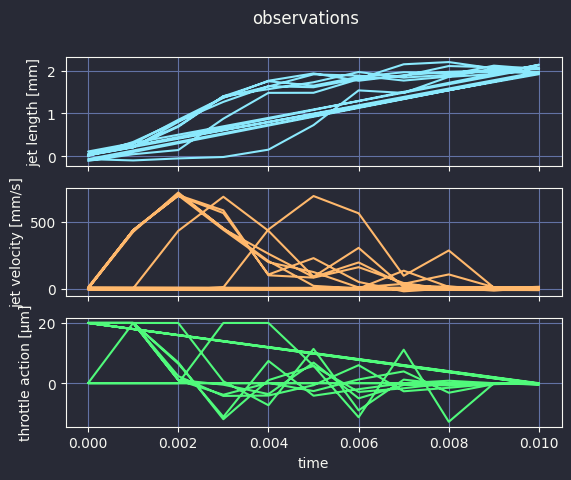

In [5]:
state_trajectory_mpc_noize = callbacks[0].data
observations_mpc_noize = callbacks[-1].data
observations_mpc_noize.to_csv('./results/observations_mpc_noize')
display(observations_mpc_noize)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

# Results

In [16]:
import numpy as np

observations_list = [
    # ('pd', observations_pd),
    ('pd_noize', observations_pd_noize),
    ('mpc_noize', observations_mpc_noize)
]

results = []

l_crit = system._parameters["l_crit"]

for name, observations in observations_list:
    
    run_obj_array = []
    max_val_array = []
    for class_index, group in observations.groupby('episode_id'):
        run_obj_array.append(group['running_objective'].iloc[-1])
        max_val_array.append(group['current_value'].iloc[-1])
        
    run_obj_array = np.array(run_obj_array)/(l_crit**2)
    max_val_array = np.array(max_val_array)*(1e3/l_crit**2)

    results.append(
        {
            'control': name,
            'last_running_objective_mean': np.mean(run_obj_array),
            'last_running_objective_std': np.std(run_obj_array),
            'value_mean': np.mean(max_val_array),
            'value_std': np.std(max_val_array),
        })

results = pd.DataFrame(results)
print('Results')
display(results)


Results


,control,last_running_objective_mean,last_running_objective_std,value_mean,value_std
0,pd_noize,0.115178,0.028831,2.833333,0.171095
1,mpc_noize,0.003065,0.004101,2.888342,1.198830
